# Table of Contents

1. <b>Data Exploration</b> - Loading Data, Structure, types, missing values, distribution of features, correlation, etc.
2. <b>Data Preprocessing</b> - Remove Unnecessary Columns, handling missing values, scaling, encoding categorical variables
3. <b>Model Training and Evaluation</b> - Linear Regression, Regression Tree, Polynomial Regression, KNN, L1 (Lasso), and L2 (Ridge) Regressions
4. <b>Prediction</b>
5. <b>Improvements</b> - Feature Engineering, Model Tuning, Feature Selection, Evaluation with Different Metrics

In [52]:
# dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import Levenshtein
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# EDA

### Read the train and label data

In [53]:
X_test = pd.read_csv('X_test.csv')
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')
# remove the useless indices from X and y-+-

X = X.drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1)
y = y.drop(['Unnamed: 0'], axis=1)
y.head()
# add the Salary from y column to X as a different dataframe
train_data = pd.concat([X, y], axis=1)
train_data

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism,Salary
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0,175966.0
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0,160000.0
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0,35000.0
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0,195000.0
4,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0,120000.0
...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,F,bachelor,junior|business|development|associat,4.0,canad,Black,2.329507,64.070050,93.0,50000.0
5359,44.0,M,p,data|scientis,15.0,chin,White,1.945457,93.478548,546.0,140000.0
5360,25.0,M,high|scho,delivery|drive,1.0,canad,Asian,1.575751,38.216264,0.0,28000.0
5361,32.0,F,bachelor's|degr,software|enginee,6.0,chin,White,1.797528,56.571118,150.0,90000.0


### Summary statistics for numerical features

In [54]:
numerical_summary = train_data.select_dtypes(include=['float64', 'int64']).describe()

numerical_summary

,Age,Years of Experience,height,weight,professionalism,Salary
count,5359.000000,5360.000000,5363.000000,5361.000000,5360.000000,5358.000000
mean,35.148722,9.660914,2.002573,66.937032,316.371735,115624.128779
std,7.615117,6.438456,0.292412,18.346610,304.989037,52754.945428
min,22.000000,1.000000,1.500276,13.637206,0.000000,500.000000
25%,29.000000,5.000000,1.750666,53.891837,84.000000,70000.000000
50%,33.000000,8.000000,2.001049,64.747191,217.000000,115000.000000
75%,39.000000,13.000000,2.262341,78.374262,451.000000,160000.000000
max,64.000000,120.000000,2.499932,200.000000,2040.000000,250000.000000


### Displaying data types and unique values for each column to identify potential categorical columns

In [55]:
data_summary = train_data.nunique().reset_index()
data_summary.columns = ['Column', 'Unique Values']
data_summary['Data Type'] = [train_data[col].dtype for col in data_summary['Column']]
data_summary

,Column,Unique Values,Data Type
0,Age,43,float64
1,Gender,3,object
2,Education Level,6,object
3,Job Title,175,object
4,Years of Experience,40,float64
5,Country,6,object
6,Race,11,object
7,height,5363,float64
8,weight,5360,float64
9,professionalism,274,float64


### Missing Values

In [56]:
# Checking for missing values in the dataset
missing_values = train_data.isnull().sum()

# Showing columns with missing values
missing_values[missing_values > 0]


Age                    4
Gender                 4
Education Level        3
Job Title              2
Years of Experience    3
weight                 2
professionalism        3
Salary                 5
dtype: int64

### Distributions 

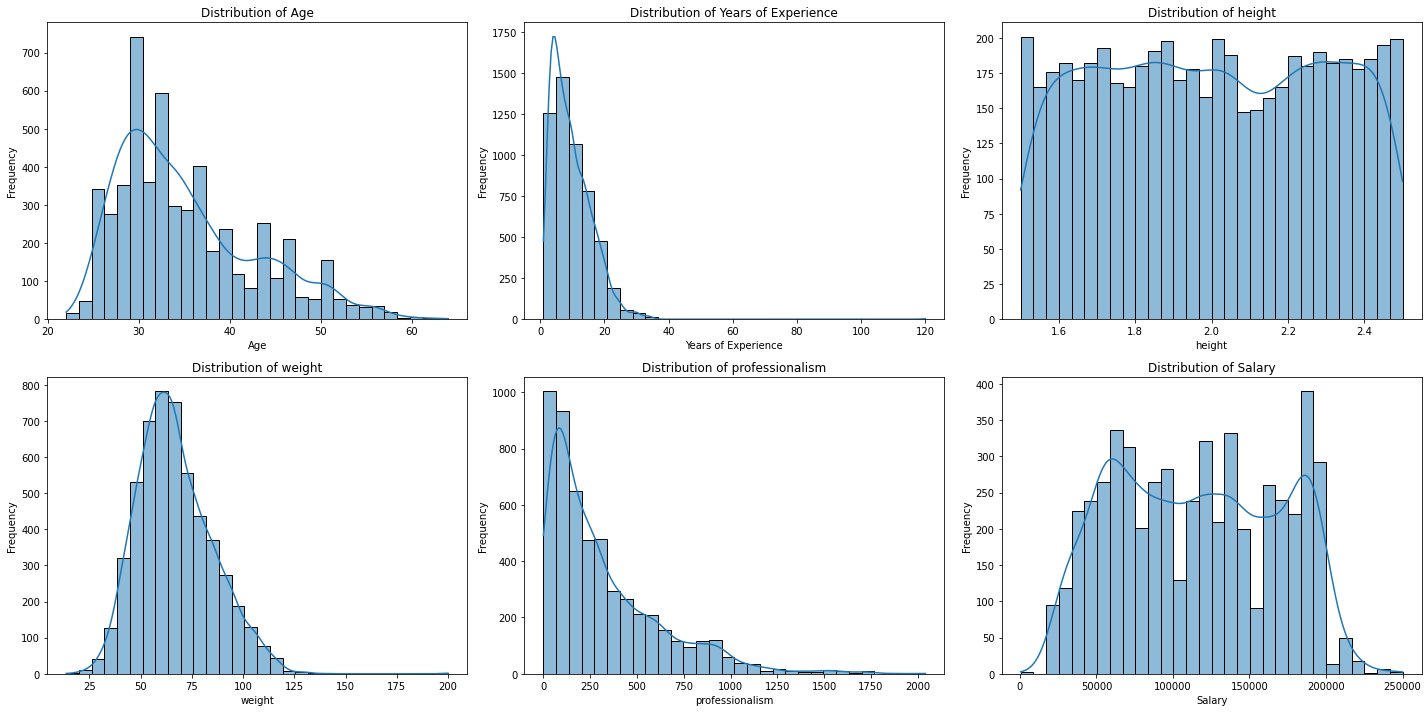

In [57]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots
rows_num = 2
cols_num = len(numeric_columns) // rows_num
fig, axes = plt.subplots(rows_num, cols_num, figsize=(20, 10))

# Iterate over each numeric column and create the distribution subplots
for i, column in enumerate(numeric_columns):
    r_x = i // cols_num
    y_x = i % cols_num
    ax = axes[r_x, y_x]
    # sns.boxplot(data=train_data, y=column, )
    sns.histplot(train_data[column], bins=30, kde=True, ax=ax)
    ax.set_title('Distribution of ' + column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

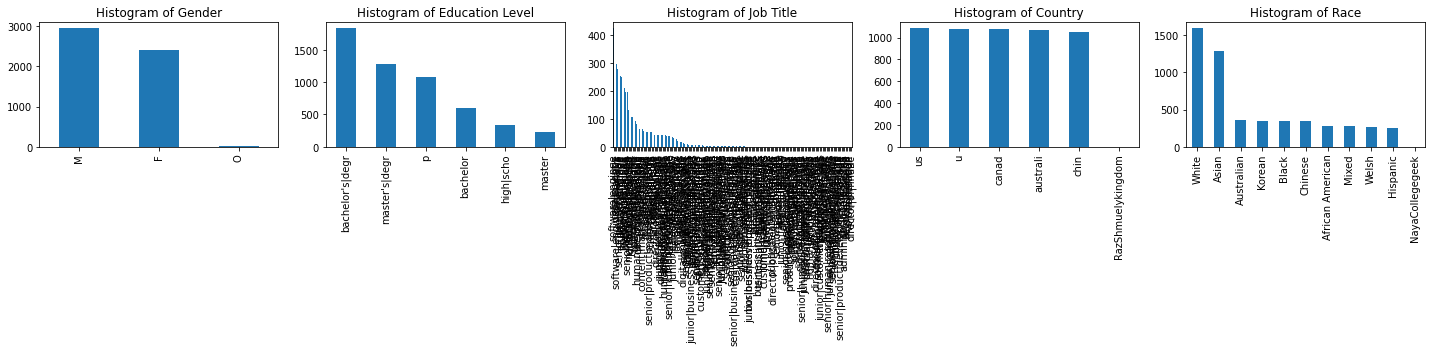

In [58]:
# Select only categorical columns
categorical_columns = train_data.select_dtypes(include='object').columns

# Create a grid of subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 5))

# Iterate over each categorical column and create a bar plot in the corresponding subplot
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = train_data[column].value_counts()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f"Histogram of {column}")

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

### Correlations

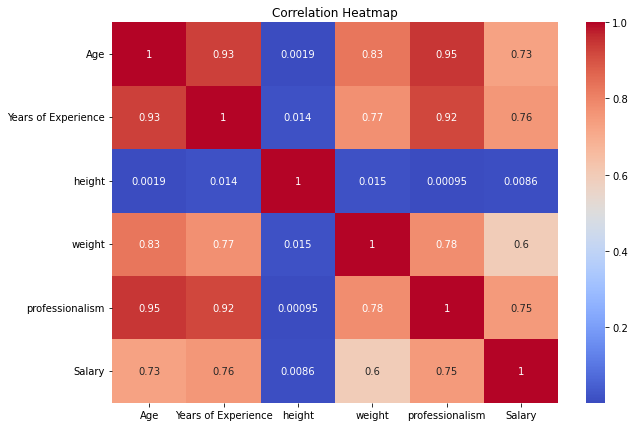

In [59]:
# Computing the correlation matrix for numerical features
correlation_matrix = train_data[numeric_columns].corr()

# Plotting the heatmap for correlations
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [60]:
# Calculating the correlation between numerical features and Salary
correlation_with_salary = train_data.corr()['Salary'].sort_values(ascending=False)

correlation_with_salary

C:\Users\natma\AppData\Local\Temp\ipykernel_9908\3633396064.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_salary = train_data.corr()['Salary'].sort_values(ascending=False)


Salary                 1.000000
Years of Experience    0.757751
professionalism        0.749656
Age                    0.729091
weight                 0.597934
height                 0.008630
Name: Salary, dtype: float64

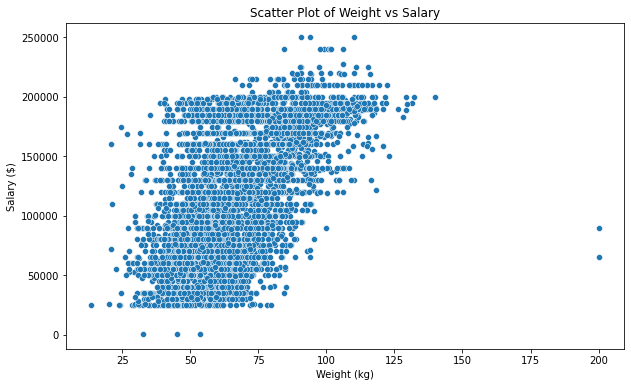

In [61]:
# Plotting a scatter plot to visualize the correlation between "Weight" and "Salary"
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['weight'], y=train_data['Salary'])
plt.title('Scatter Plot of Weight vs Salary')
plt.xlabel('Weight (kg)')
plt.ylabel('Salary ($)')
plt.show()

### Outliers

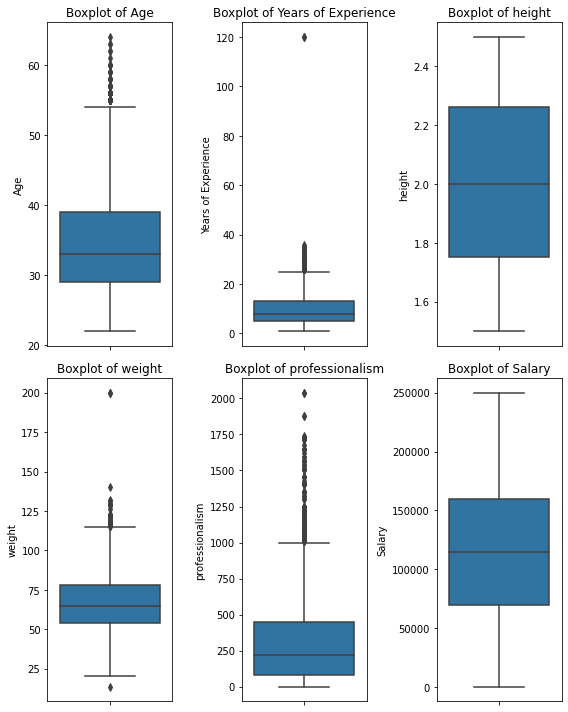

In [62]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots
rows_num = 2
cols_num = len(numeric_columns) // rows_num
fig, axes = plt.subplots(rows_num, cols_num, figsize=(8, 10))

# Iterate over each numeric column and create a boxplot in the corresponding subplot
for i, column in enumerate(numeric_columns):
    r_x = i // cols_num
    y_x = i % cols_num
    ax = axes[r_x, y_x]
    sns.boxplot(data=train_data, y=column, ax=ax)
    ax.set_title(f"Boxplot of {column}")

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

In [63]:
import pandas as pd

# Define the thresholds for each column
thresholds = {
    'Age': (18, 70),
    'Years of Experience': (0, 40),
    'height': (1.4, 2.2),
    'weight': (40, 150),
    'Salary': (20000, 250000),
    'professionalism': (0, 1000)
}

# Create an empty dictionary to store the outliers
outliers = {}

# Iterate over each column and find the outliers
for column, (lower_threshold, upper_threshold) in thresholds.items():
    column_outliers = train_data[(train_data[column] < lower_threshold) | (train_data[column] > upper_threshold)][column]
    outliers[column] = column_outliers

# Print the outliers
for column, column_outliers in outliers.items():
    print(f"{column} outliers:")
    print("Count:", column_outliers.count())
    print("Unique values:", column_outliers.unique())
    print()

Age outliers:
Count: 0
Unique values: []

Years of Experience outliers:
Count: 2
Unique values: [120.]

height outliers:
Count: 1681
Unique values: [2.4514137  2.20977114 2.34989206 ... 2.33841282 2.21973778 2.32950731]

weight outliers:
Count: 242
Unique values: [ 33.49648793  36.052284    34.82411107  30.56092749  36.59050537
  38.52149224  36.6705717   36.39949168  33.57493516  38.27267918
  39.20147434  39.10473482  35.30740248  36.71576166  20.99013573
  39.81398679  27.5479202   30.3247903  200.          38.66523987
  37.33212074  29.52687785  39.34235588  36.41468628  37.9318699
  39.49820869  38.95502466  38.71647095  39.22969289  39.10765285
  30.06400785  38.11335569  36.29701702  24.06004995  36.09342956
  37.20380287  28.71752928  33.89832212  39.35048439  34.20487189
  35.56091601  32.30531308  32.87190723  39.62102881  31.02171591
  36.14740617  34.50510973  36.25863601  38.25280086  35.59416597
  29.72117803  37.54112413  35.19579386  37.78417557  39.71321991
  39.198550

### Conclusions:
1. years_of_experience - Delete the two 120
2. Height - A normal distribution
3. weight - There are 200+ childish weights, but still, there is an outlier (200 kg) 
4. salary - Delete the three outliers
5. professionalism - There are 175 big values, maybe use percentile of 0.95 to remove the extreme upper limit.

### Categorical Feature Insights

In [64]:
# Gender,Education Level, Job Title, country, race

# Gender distribution
gender_distribution = train_data['Gender'].value_counts()
gender_distribution

M    2944
F    2403
O      12
Name: Gender, dtype: int64

In [65]:
# Education Level distribution
education_level_distribution = train_data['Education Level'].value_counts()

education_level_distribution.head(10) # Displaying the top 10 most frequent education levels

bachelor's|degr    1832
master's|degr      1281
p                  1078
bachelor            602
high|scho           337
master              230
Name: Education Level, dtype: int64

In [66]:
# Job Title distribution
job_title_distribution = train_data['Job Title'].value_counts()

job_title_distribution.head(10) # Displaying the top 10 most frequent job titles

software|enginee            424
data|scientis               350
software|engineer|manage    298
data|analys                 279
senior|project|enginee      264
product|manage              253
full|stack|enginee          250
front|end|develope          217
marketing|manage            211
back|end|develope           197
Name: Job Title, dtype: int64

In [67]:
# country Level distribution
country_distribution = train_data['Country'].value_counts()

country_distribution.head(20) # Displaying the top 10 most frequent country

us                   1085
u                    1083
canad                1076
australi             1068
chin                 1049
RazShmuelykingdom       2
Name: Country, dtype: int64

In [68]:
# race Level distribution
race_distribution = train_data['Race'].value_counts()

race_distribution.head(10) # Displaying the top 10 most frequent race

White               1594
Asian               1292
Australian           360
Korean               351
Black                350
Chinese              349
African American     275
Mixed                275
Welsh                264
Hispanic             251
Name: Race, dtype: int64

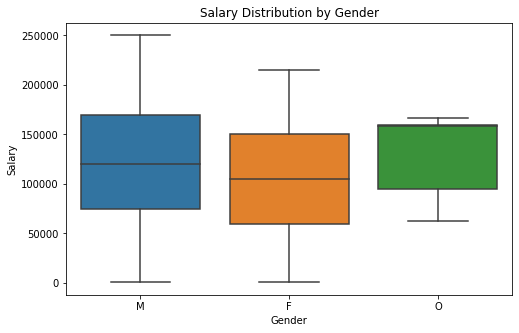

In [69]:
# Plotting the median salary by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Salary', data=train_data)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()


# Data Preparation

In [70]:
# Lets look at the tail of the job titles
print(train_data['Job Title'].value_counts().tail(10), '\n')
print(train_data['Job Title'].value_counts().head(10), '\n')

technical|recruite                   1
senior|product|development|manage    1
develope                             1
social|media|ma                      1
administrative|assistan              1
account|manage                       1
help|desk|analys                     1
hr|manage                            1
vp|of|operation                      1
director|of|financ                   1
Name: Job Title, dtype: int64 

software|enginee            424
data|scientis               350
software|engineer|manage    298
data|analys                 279
senior|project|enginee      264
product|manage              253
full|stack|enginee          250
front|end|develope          217
marketing|manage            211
back|end|develope           197
Name: Job Title, dtype: int64 



* Conclusion - the endings are malformed, most of the time is a single letter.
* Solution - Use Levenshtein similarity and lookup for the most similar option.

### Transformers

In [121]:
class JobTitleTransformer(BaseEstimator, TransformerMixin):
    json_file = 'job-titles.json'
    
    def __init__(self):
        # Read the json of correct job titles
        with open(self.json_file, 'r') as f:
            job_titles = json.load(f)
        self.job_titles = job_titles['job-titles']

    def transform(self, X, y=None):
        X['Job Title'] = X['Job Title'].str.replace('|', ' ', regex=False)
        new_mapping = {title: JobTitleTransformer._get_closest_text(title, texts=self.job_titles) for title in 
                       X['Job Title'].unique()}
        X['Job Title'] = X['Job Title'].replace(new_mapping)
        return X

    def fit(self, X, y=None):
        return self
    
    @staticmethod
    def _get_closest_text(query_text, texts):
        closest_text = min(texts, key=lambda x: Levenshtein.distance(query_text, x))
        return closest_text

class CountryTransformer(BaseEstimator, TransformerMixin):
    # Define the custom function to fix the values in the 'country' column
    def transform(self, X, y=None):
        X['Country'] = X['Country'].replace({
            'australi': 'australia',
            'us': 'united states',
            'u': 'unknown',
            'chin': 'china',
            'canad': 'canada'
        })
        return X
    
    def fit(self, X, y=None):
        return self

class EducationTitleTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Education Level'] = X['Education Level'].replace({
            "high|scho": "High School",
            "bachelor's|degr": "Bachelor's Degree",
            "bachelor": "Bachelor's Degree",
            "master's|degr": "Master's Degree",
            "master": "Master's Degree",
            "p": "Ph.D."
        })
        return X

class OutlierTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X , y=None, years=40, salary=20000, bad_countries=['RazShmuelykingdom'], 
                  bad_races=['NayaCollegegeek'], bad_genders=['O']):
        return X[(X['Years of Experience'] <= years) & 
                 (X['Salary'] >= salary) & 
                 (~X['Country'].isin(bad_countries)) & 
                 (~X['Race'].isin(bad_races)) &
                 (~X['Gender'].isin(bad_genders))].copy()


def drop_bad_columns(X: pd.DataFrame):
    return X.dropna().copy()

In [122]:
education_order = ['High School', "Bachelor's Degree", "Master's Degree", 'Ph.D.'] # Order for ordinal encoding

# Define the pipeline for the preprocessing
ct = ColumnTransformer([
        ('GenderEncoder', OneHotEncoder(drop=None, sparse_output=False), ['Gender', 'Country', 'Race']),
        ('EducationLevelEncoder', OrdinalEncoder(categories=[education_order]), ['Education Level']),
    ], remainder='passthrough', verbose_feature_names_out=False)

ct.set_output(transform='pandas')

pipeline = Pipeline([
    ('DropNaTransformer', FunctionTransformer(drop_bad_columns)),
    ('CountryTransformer', CountryTransformer()),
    ('JobTitleTransformer', JobTitleTransformer()),
    ('EducationTitleTransformer', EducationTitleTransformer()),
    ('OutlierTransformer', OutlierTransformer()),
    ('ColumnTransformers', ct),
])

transformed_train_data = pipeline.fit_transform(train_data)

### Post Transformation EDA

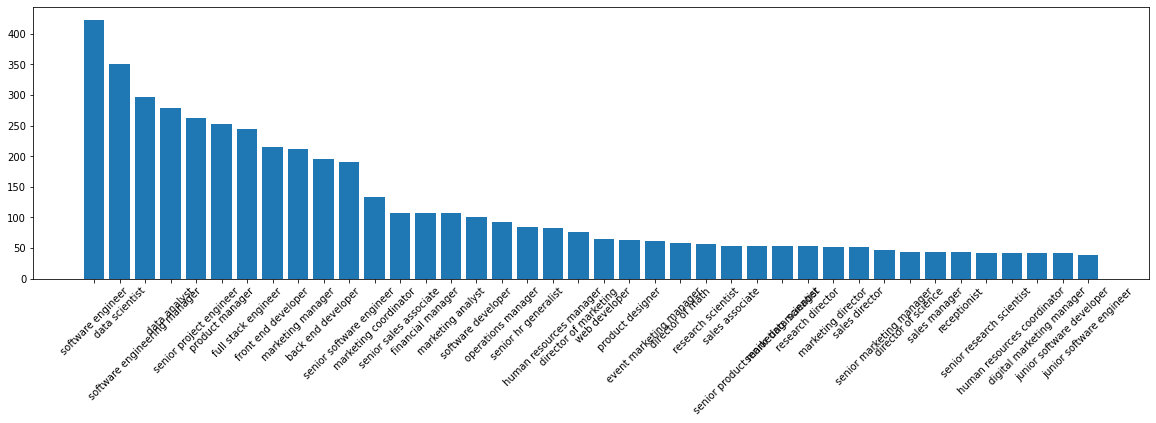

In [125]:
plt.figure(figsize=(20, 5))
plt.bar(x=transformed_train_data['Job Title'].value_counts().head(40).index, height=transformed_train_data['Job Title'].value_counts().head(40))
plt.xticks(rotation=45)
plt.show()

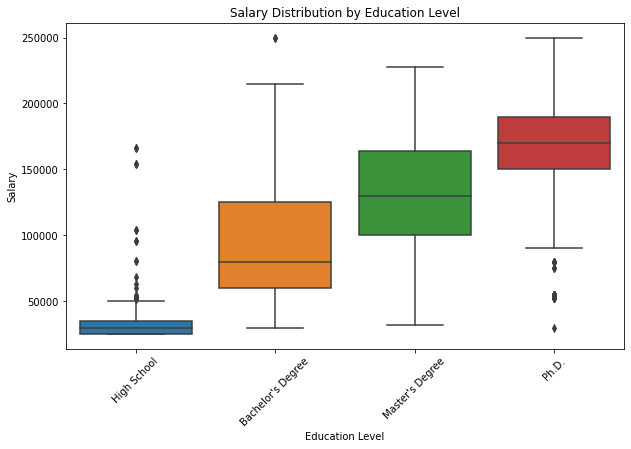

In [127]:
# Plotting the median salary by Education Level
education_level_mapping = {0: 'High School', 1: "Bachelor's Degree", 2: "Master's Degree", 3: 'Ph.D.'}
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=transformed_train_data.replace(education_level_mapping), order=education_order)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

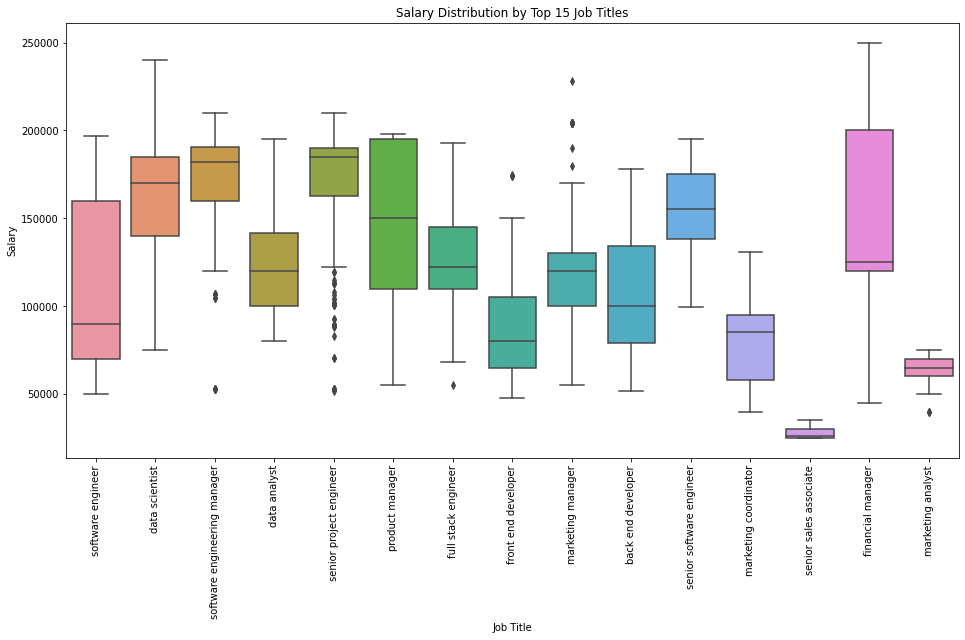

In [131]:
# Handeling Jon Title

# Exploring the relationship between job titles and other features
# Plotting the median salary for the top 15 most frequent Job Titles
top_15_job_titles = transformed_train_data['Job Title'].value_counts().index[:15]
top_15_job_titles_data = transformed_train_data[transformed_train_data['Job Title'].isin(top_15_job_titles)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='Job Title', y='Salary', data=top_15_job_titles_data, order=top_15_job_titles)
plt.title('Salary Distribution by Top 15 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


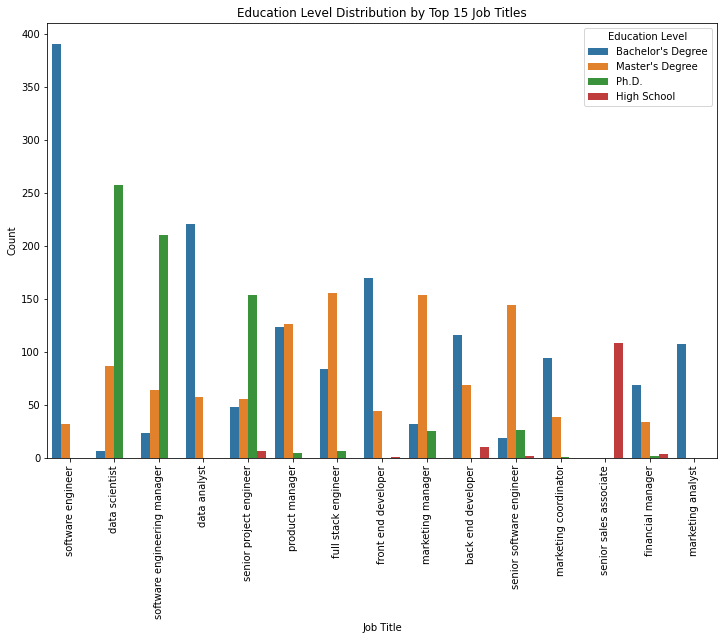

In [132]:
# Relationship with Education Level
# Mapping the ordinal encoded Education Level back to the categorical representation for visualization
education_level_mapping = {0: 'High School', 1: "Bachelor's Degree", 2: "Master's Degree", 3: 'Ph.D.'}
#top_15_job_titles_data['Education Level'] = top_15_job_titles_data['Education Level'].map(education_level_mapping)

# Plotting the Education Level distribution for the top 15 most frequent Job Titles
plt.figure(figsize=(12, 8))
sns.countplot(data=top_15_job_titles_data.replace(education_level_mapping), x='Job Title', hue='Education Level', order=top_15_job_titles)
plt.title('Education Level Distribution by Top 15 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Education Level')
plt.show()


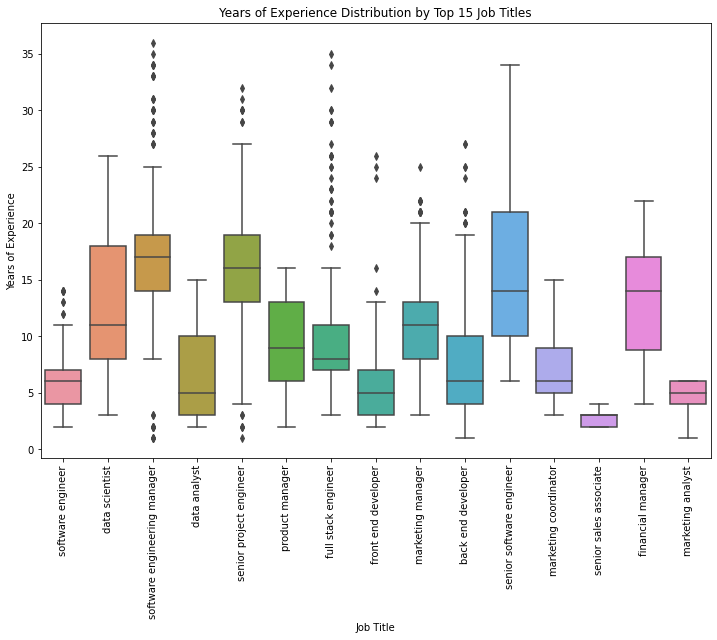

In [133]:
# Plotting the distribution of Years of Experience for the top 15 most frequent Job Titles
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job Title', y='Years of Experience', data=top_15_job_titles_data, order=top_15_job_titles)
plt.title('Years of Experience Distribution by Top 15 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Years of Experience')
plt.xticks(rotation=90)
plt.show()


In [144]:
# analyzing the common words and phrases within the job titles to identify potential groupings

from collections import Counter

# Tokenizing the job titles and counting the frequency of words
job_title_words = ' '.join(transformed_train_data['Job Title']).split()
word_counts = Counter(job_title_words)

# Getting the top 20 most common words
top_20_words = word_counts.most_common(20)
top_20_words


[('manager', 1411),
 ('engineer', 1167),
 ('software', 1097),
 ('senior', 947),
 ('marketing', 823),
 ('data', 702),
 ('developer', 655),
 ('scientist', 504),
 ('analyst', 495),
 ('end', 410),
 ('product', 378),
 ('director', 352),
 ('sales', 348),
 ('project', 321),
 ('engineering', 299),
 ('full', 245),
 ('stack', 245),
 ('junior', 215),
 ('front', 215),
 ('coordinator', 214)]

In [146]:
# Identifying job titles containing terms related to management (e.g., "manager", "director")
management_keywords = ['manager', 'director', 'lead', 'supervisor', 'head']
management_titles = [title for title in transformed_train_data['Job Title'] if any(keyword in title for keyword in management_keywords)]

# Counting the frequency of management job titles
management_title_counts = Counter(management_titles)

# Getting the top 10 most common management job titles
top_10_management_titles = management_title_counts.most_common(10)
top_10_management_titles, len(management_titles)

([('software engineering manager', 297),
  ('product manager', 253),
  ('marketing manager', 211),
  ('financial manager', 108),
  ('operations manager', 93),
  ('human resources manager', 82),
  ('director of marketing', 76),
  ('event marketing manager', 62),
  ('director of math', 58),
  ('senior product marketing manager', 53)],
 1763)

In [149]:
# Identifying Job Categories

# Defining potential categories and associated keywords
job_categories_keywords = {
    "Engineering": ['engineer', 'developer', 'software'],
    "Data": ['data', 'analyst', 'scientist'],
    "Marketing": ['marketing', 'sales', 'marketing'],
    "Human Resources": ['hr', 'human resources'],
    "Finance": ['finance', 'financial'],
    "Management": ['manage', 'operations']
}

# Counting the frequency of job titles within each category
job_categories_counts = {category: sum(any(keyword in title for keyword in keywords) for title in transformed_train_data['Job Title']) for category, keywords in job_categories_keywords.items()}
job_categories_counts


{'Engineering': 2123,
 'Data': 1000,
 'Marketing': 1170,
 'Human Resources': 255,
 'Finance': 165,
 'Management': 1431}

In [150]:
# Identifying Seniority Levels:

# Defining potential seniority levels and associated keywords
seniority_keywords = {
    "Senior": ['senior', 'sr', 'lead'],
    "Junior": ['junior', 'jr', 'entry'],
    "Executive": ['executive', 'chief', 'director']
}

# Counting the frequency of job titles within each seniority level
seniority_counts = {level: sum(any(keyword in title for keyword in keywords) for title in transformed_train_data['Job Title']) for level, keywords in seniority_keywords.items()}

# Identifying titles that do not fall into the defined seniority levels (potential Mid-Level)
mid_level_count = len(train_data['Job Title']) - sum(seniority_counts.values())
seniority_counts['Mid-Level'] = mid_level_count
seniority_counts


{'Senior': 947, 'Junior': 216, 'Executive': 380, 'Mid-Level': 3820}

In [153]:
# adding the "Management Role" column

# management keywords to match the format of job titles
management_keywords_formatted = ['manager', 'director', 'lead', 'supervisor', 'head']

# Function to identify management role
def identify_management_role(title):
    return int(any(keyword in title for keyword in management_keywords_formatted))

# Re-adding the "Management Role" column (1 for management role, 0 otherwise)
transformed_train_data['Management Role'] = transformed_train_data['Job Title'].apply(identify_management_role)

# Checking the first few rows to verify the new column
transformed_train_data[['Job Title', 'Management Role']].head()

,Job Title,Management Role
0,back end developer,0
1,operations manager,1
2,junior accountant,0
3,data analyst,0
4,senior product manager,1


In [154]:
# Function to identify job category
def identify_job_category(title):
    for category, keywords in job_categories_keywords.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Other'  # If the title does not fall into any defined category

# Adding the "Job Category" column
transformed_train_data['Job Category'] = transformed_train_data['Job Title'].apply(identify_job_category)

# Checking the first few rows to verify the new column
transformed_train_data[['Job Title', 'Job Category']].head()


,Job Title,Job Category
0,back end developer,Engineering
1,operations manager,Management
2,junior accountant,Other
3,data analyst,Data
4,senior product manager,Management


In [158]:
# Extracting job titles that were categorized as "Other"
other_category_titles = transformed_train_data[transformed_train_data['Job Category'] == 'Other']['Job Title']

# Displaying a sample of job titles categorized as "Other"
other_category_sample = other_category_titles.sample(100, random_state=42)
other_category_sample.unique().tolist()

['director of science',
 'junior project coordinator',
 'graphic designer',
 'research director',
 'senior project coordinator',
 'director of math',
 'product designer',
 'senior product designer',
 'receptionist',
 'business development associate',
 'junior accountant',
 'it support specialist',
 'senior accountant',
 'ux designer',
 'direct support specialist',
 'senior consultant',
 'social media specialist',
 'event coordinator',
 'customer service representative',
 'junior web designer',
 'delivery driver',
 'senior it specialist',
 'recruiter']

In [40]:
# Add "Seniority Level" Column

# Function to identify seniority level
def identify_seniority_level(title):
    for level, keywords in seniority_keywords.items():
        if any(keyword in title for keyword in keywords):
            return level
    return 'Mid-Level'  # If the title does not fall into any defined seniority level

# Adding the "Seniority Level" column
train_data['Seniority Level'] = train_data['Job Title'].apply(identify_seniority_level)

# Checking the first few rows to verify the new column
train_data[['Job Title', 'Seniority Level']].head()


,Job Title,Seniority Level
0,back|end|develope,Mid-Level
1,operations|manage,Mid-Level
2,junior|accountan,Junior
3,data|analys,Mid-Level
4,senior|product|manage,Senior


In [42]:
# Encoding the remaining categorical columns, "Job Category" and "Seniority Level

# Dropping the original "Job Title" column
train_data = train_data.drop(columns=['Job Title'])

# Applying one-hot encoding to "Job Category" and "Seniority Level" columns
train_data = pd.get_dummies(train_data, columns=['Job Category', 'Seniority Level'], drop_first=True)

# Displaying the first few rows of the final encoded data
train_data.head()

,Age,Education Level,Years of Experience,height,weight,id,professionalism,Salary,Gender_M,Gender_O,...,Management Role,Job Category_Engineering,Job Category_Finance,Job Category_Human Resources,Job Category_Management,Job Category_Marketing,Job Category_Other,Seniority Level_Junior,Seniority Level_Mid-Level,Seniority Level_Senior
0,52.0,1.0,24.0,1.800316,95.021957,2477,1150.0,175966.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,52.0,1.0,23.0,2.451414,87.456039,76,1100.0,160000.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
2,27.0,1.0,2.0,1.917509,56.997108,64,26.0,35000.0,1.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,32.0,1.0,11.0,2.160562,61.403169,924,279.0,195000.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,39.0,1.0,11.0,1.794105,72.049210,242,380.0,120000.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
# Standardizing the numerical features

# TODO: Standardizing only the following columns:  Age, Years of Experience, height, weight, professionalism, Salary

# Importing the StandardScaler
from sklearn.preprocessing import StandardScaler

# Separating the features (X) and target variable (y)
X = data_encoded_final.drop(columns=['Salary'])
y = data_encoded_final['Salary']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the features
X_scaled = scaler.fit_transform(X)

# Converting the scaled features to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Displaying the first few rows of the scaled features
X_scaled_df.head()


In [ ]:
# feature selection

In [ ]:
# TODO: Do all transformation to new data for prediction